<a href="https://colab.research.google.com/github/HrisheekAsanabada/CMPE257-Fall23-Project-Optiver-Trading-at-the-Close/blob/017422717/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

PATH_DATASET = "/content/drive/MyDrive/MLProject/optiver-trading-at-the-close"

In [2]:
df_train = pd.read_csv(os. path.join(PATH_DATASET, "train.csv"))
print(f"data size: {len(df_train)}")
## Dropping rows with target null values
drop_idx = df_train.loc[df_train['target'].isna(), 'target'].index.to_list();
train    = df_train.drop(drop_idx, axis=0);
display(df_train.head())
df_train.info()

data size: 5237980


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


Analyzing few stocks ids

In [3]:
df_train_sub = df_train[df_train['stock_id'].isin([46, 101, 103])]
df_train_sub.shape

(79365, 17)

In [4]:
df_train_sub.isnull().sum()

stock_id                       0
date_id                        0
seconds_in_bucket              0
imbalance_size                55
imbalance_buy_sell_flag        0
reference_price               55
matched_size                  55
far_price                  44074
near_price                 43315
bid_price                     55
bid_size                       0
ask_price                     55
ask_size                       0
wap                           55
target                         1
time_id                        0
row_id                         0
dtype: int64

Here far_price and near_price are null for limit orders.

**Distributions between positive and negative targets among different variables.**

<ipython-input-5-2b89c8b11d40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_sub['target_'] = df_train_sub['target'] >= 0


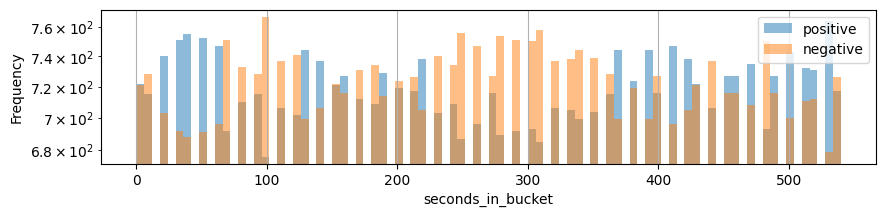

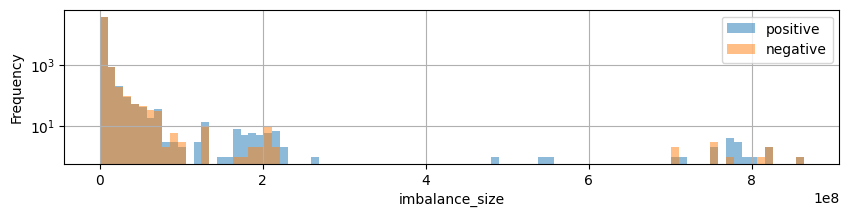

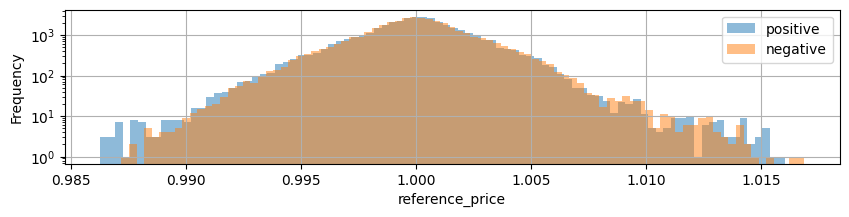

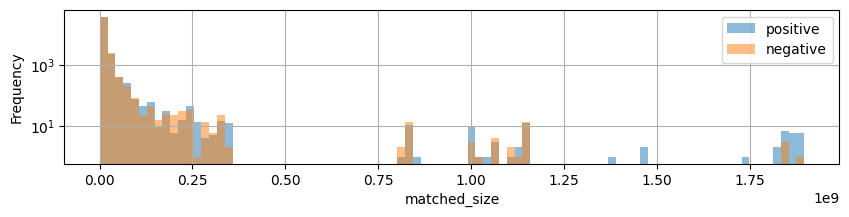

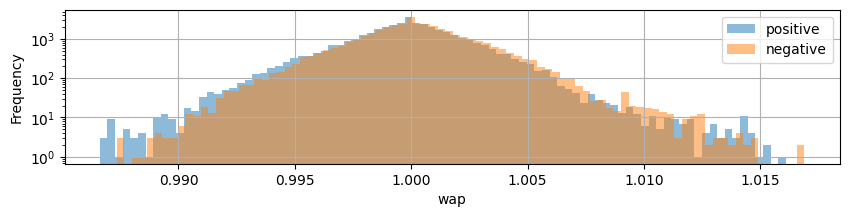

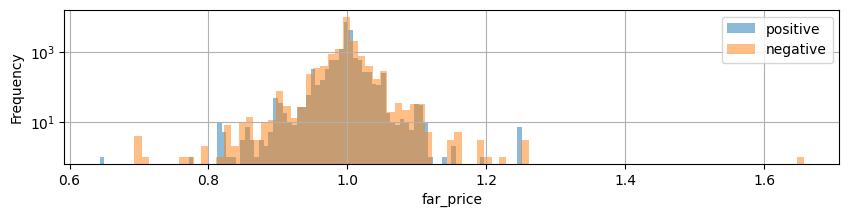

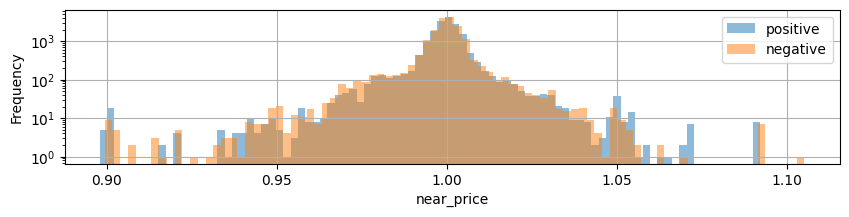

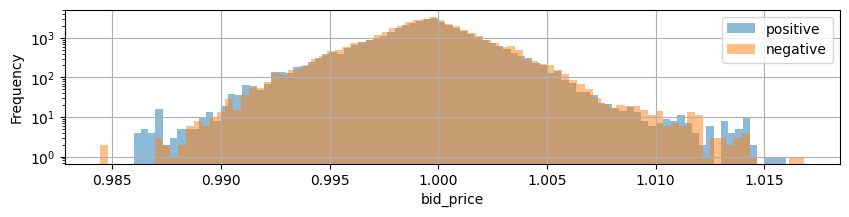

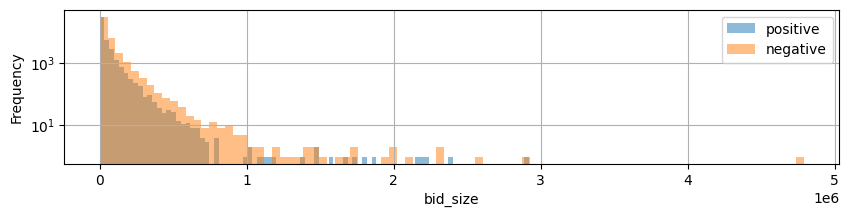

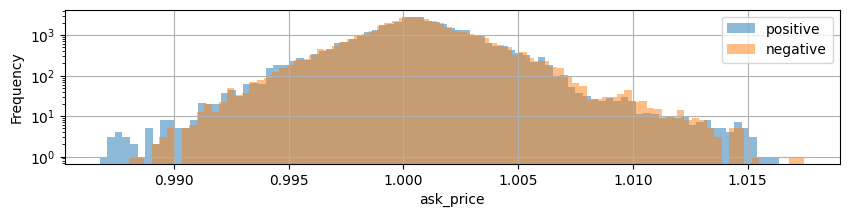

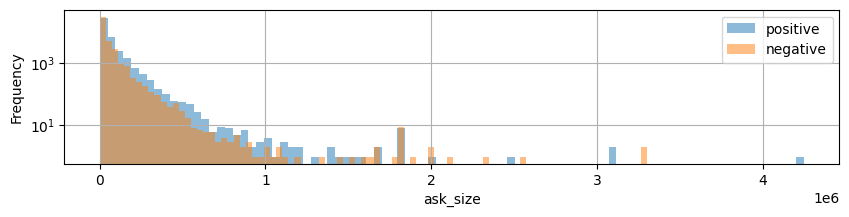

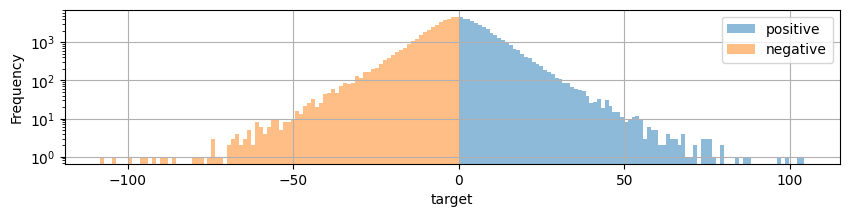

In [5]:
df_train_sub['target_'] = df_train_sub['target'] >= 0
for col in ['seconds_in_bucket', 'imbalance_size', 'reference_price', 'matched_size', 'wap',
            'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'target']:
    fig,ax = plt.subplots(figsize=(10, 2))
    # sns.histplot(data=df_train, x=col, hue="target_", ax=fig.gca())
    hist_kwargs = dict(ax=fig.gca(), alpha=0.5, bins=90, logy=True, xlabel=col, grid=True)
    df_train_sub[df_train_sub['target_']][col].plot.hist(label="positive", **hist_kwargs)
    df_train_sub[~df_train_sub['target_']][col].plot.hist(label="negative", **hist_kwargs)
    ax.set_xlabel(col)
    fig.gca().legend()

Trying to figure out distribution of positive instances and negative instance distributions.



**Feature correlation with values**

In [6]:
import plotly.graph_objects as go
stock_id_0_df=df_train_sub[df_train_sub['stock_id'] == 46]
# print(df_train_sub.head())
fig = go.Figure()
fig.add_trace(
    go.Scatter(x = stock_id_0_df['time_id'],
            y = stock_id_0_df['ask_price'],
            name = 'ask price',
            line = dict(color = 'blue')))

fig.add_trace(
    go.Scatter(x = stock_id_0_df['time_id'],
            y = stock_id_0_df['bid_price'],
            name = 'bid price',
            line = dict(color = 'green')))
# fig.add_trace(
#     go.Scatter(x = stock_id_0_df['time_id'],
#             y = stock_id_0_df['reference_price'],
#             name = 'reference_price',
#             line = dict(color = 'red')))

fig.update_layout(title = "Overview for Ask Price and Bid Price",
                title_font = dict(size = 15),
                showlegend = True,
                width = 1000,
                height = 400,
                margin = dict(l = 40, r = 40, t = 40, b = 20))

In [7]:
corr = df_train_sub.corr().round(2)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr = corr.mask(mask).dropna(how='all')
fig = px.imshow(corr, text_auto=".2f", aspect=0.5,width=800, height=800,title='1. Correlation Plot')
fig.show()

<ipython-input-7-d1c6a3440896>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



We see that reference price is closely related to  bid_price, ask_price, wap. All these variables are closely related to each other as wap is calculated from ask_price and bid_price and reference price is the expressed in terms of wap.

far-price and near_price are related to each other with a fair correlation of 0.70.

Price movement for a subset of stock id selected

Text(0.5, 0.98, 'Target Over Time for Different Stocks on Day 12 for randomly selected 3 stocks')

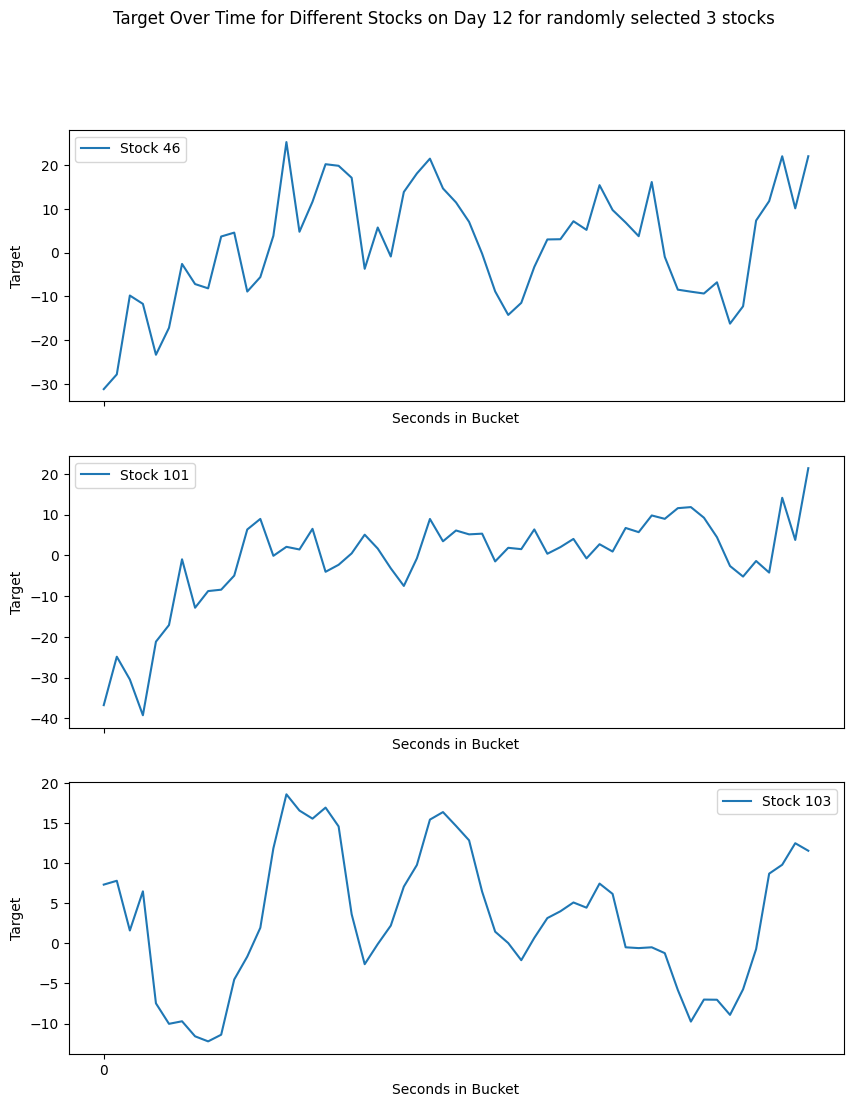

In [8]:
random_ids=[46,101,103]
fig, axs = plt.subplots(len(random_ids), 1, figsize=(10, 4 * len(random_ids)), sharex=True)
colors = sns.color_palette("husl", n_colors=len(random_ids))
selected_date_id=12
df_train_date=df_train_sub[df_train_sub['date_id'] == selected_date_id]
for i, stock_id in enumerate(random_ids):
    df_stock = df_train_date[df_train_date['stock_id'] == stock_id]
    axs[i].plot(df_stock['seconds_in_bucket'], df_stock['target'], label=f'Stock {stock_id}')
    axs[i].legend()
    axs[i].set_ylabel('Target')
    axs[i].set_xlabel('Seconds in Bucket')
    axs[i].set_xticks(df_stock['seconds_in_bucket'][::600])

plt.suptitle('Target Over Time for Different Stocks on Day 12 for randomly selected 3 stocks')

The above shows the variation of wap for three particular stocks for the last minute on a particular day

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



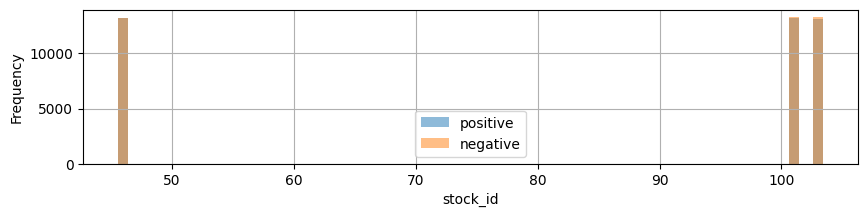

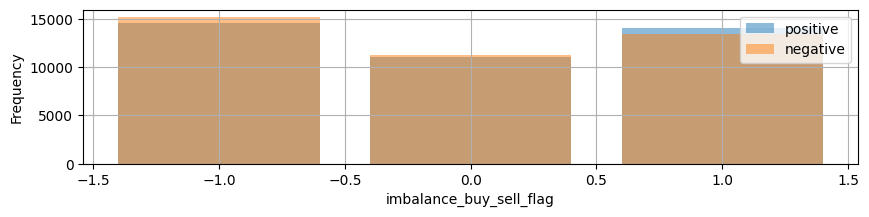

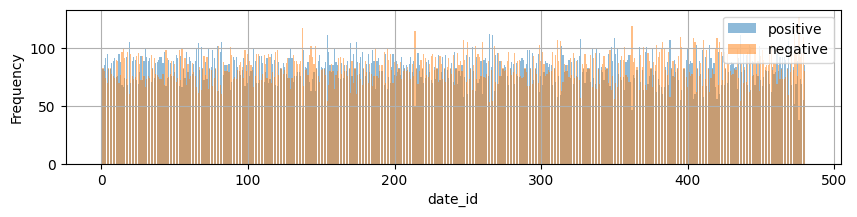

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



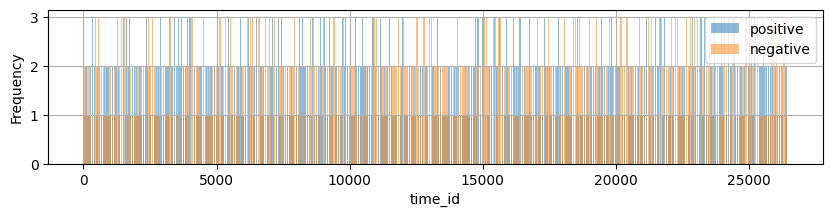

In [9]:
for col in ['stock_id', 'imbalance_buy_sell_flag', 'date_id', 'time_id']:  #
    lbs_pos, counts_pos = np.unique(df_train_sub[df_train_sub['target_']][col].values, return_counts=True)
    lbs_neg, counts_neg = np.unique(df_train_sub[~df_train_sub['target_']][col].values, return_counts=True)
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.bar(lbs_pos, counts_pos, alpha=0.5, label="positive")
    ax.bar(lbs_neg, counts_neg, alpha=0.5, label="negative")
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid()

Here the brown colour is combination of both blue and orange. Checking the frequency of positive and negative instances with respect to different columns. The first plot indicates there are 3 stocks taken into consideration. For all the plots we understand that there is a mixture of both positive and negative instances.

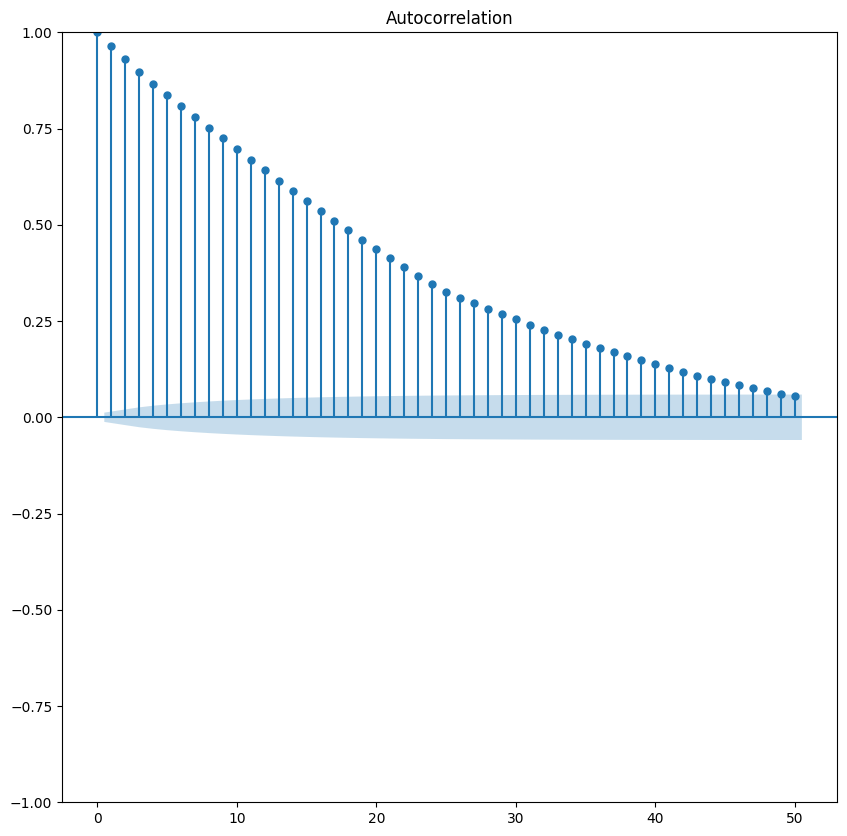

In [10]:
import statsmodels.api as sm
df_train_46 = df_train[df_train['stock_id'].isin([46])]
plt.rc("figure", figsize=(10,10))
sm.graphics.tsa.plot_acf(df_train_46['reference_price'], lags=50);

Data Normalization using MinMax scaler method

In [11]:
from sklearn.model_selection import train_test_split
values = df_train.values
train, test =train_test_split(values)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train)

In [13]:
preprocessed_data_path='/content/drive/MyDrive/MLProject/data_after_preprocessing.csv'

In [14]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score
temp = dict(layout = go.Layout(font = dict(family="Franklin Gothic", size=12), width = 1500))

import torch
from torch import nn
import torch.nn.init as init
from torch.utils.data import DataLoader, TensorDataset, random_split
import time

In [15]:
pre_trained_data=pd.read_csv('/content/drive/MyDrive/MLProject/data_after_preprocessing.csv')


In [16]:
pre_trained_data.head()


,Unnamed: 0,imbalance_size,matched_size,bid_price,ask_size,bid_size,ask_price,reference_price,near_price_norm,far_price_norm,wap,volume,liquidity_imbalance,target
0,38,8940183.86,10108466.29,0.999849,79368.99,26330.26,1.000455,1.000334,5.300000e-04,-0.00215,1.000000,105699.25,-0.501789,7.829666
1,40,3338208.46,2860543.58,0.999196,86.44,12955.50,1.000005,0.999080,-9.200000e-04,-0.00488,1.000000,13041.94,0.986744,-1.379847
2,98,139778.86,1085206.20,0.999146,15377.80,11510.40,1.001138,0.999537,8.516521e-12,0.01947,1.000000,26888.20,-0.143833,8.449554
3,229,8765420.30,10723317.02,1.000455,59734.26,26511.39,1.000818,1.000697,-1.990000e-03,0.01294,1.000566,86245.65,-0.385212,4.780292
4,231,3159019.30,3039732.74,1.000121,432.40,42879.20,1.000468,1.000468,1.320000e-03,0.00188,1.000465,43311.60,0.980033,2.969503


In [17]:
def add_historic_features(df, cols, shifts=3, add_first=True):
    for col in cols:
        grouped_vals = df[["stock_id", "date_id", col]].groupby(["stock_id","date_id"])
        fill_value = df[col].mean()

        for shift in np.arange(shifts):
            df[col+"_shift"+str(shift+1)] = grouped_vals.shift(shift+1).fillna(fill_value)

        if add_first:
            df = df.merge(grouped_vals.first().reset_index(), on=["date_id","stock_id"], suffixes=["","_first"])
    return df

In [18]:
x_cols = [c for c in pre_trained_data.columns if c not in ['row_id', 'time_id', 'date_id', 'target']]
y_cols = ["target"]

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [20]:
class LSTMwithAttention(nn.Module):
    def __init__(self, input_size=14, hidden_layer_size=50, output_size=1, num_layers=5):
        super().__init__()

        self.input_size = input_size
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.batch_size = 1

        self.conv1d = nn.Conv1d(in_channels=14, out_channels=20, kernel_size=2)
        self.lstm = nn.LSTM(20, hidden_layer_size, num_layers, dropout=0.2)

        layers = [
                nn.Linear(hidden_layer_size, hidden_layer_size),
                nn.Linear(hidden_layer_size, hidden_layer_size),
                nn.Linear(hidden_layer_size, output_size)
                ]

        self.linear_layers = nn.Sequential(*layers)

        init_rnn(self.lstm, 'xavier')
        self.dropout = nn.Dropout(0.5)
        self.attn_weights = None

    def attention_net(self, lstm_output, final_state):
        lstm_output = lstm_output.permute(1, 0, 2)
        hidden = final_state.view(-1, self.hidden_layer_size, self.num_layers)
        self.attn_weights = torch.bmm(lstm_output, hidden).squeeze(2)

        soft_attn_weights = torch.tanh(self.attn_weights)
        context = torch.bmm(lstm_output.transpose(1, 2), soft_attn_weights).squeeze(2)
        return context

    def forward(self, input_seq):
        input_seq = input_seq.unsqueeze(0).permute(0, 2, 1)
        input_seq = self.conv1d(input_seq)
        input_seq = input_seq.permute(0, 2, 1)

        lstm_out, self.hidden_cell = self.lstm(input_seq.reshape(len(input_seq[0]), 1, 20))
        attn_output = self.attention_net(lstm_out, self.hidden_cell[0])

        out = self.linear_layers(attn_output.view(-1, self.hidden_layer_size))
        out = torch.tanh(out)

        return out[-1]

def init_rnn(x, type='uniform'):
    for layer in x._all_weights:
        for w in layer:
            if 'weight' in w:
                if type == 'xavier':
                    init.xavier_normal_(getattr(x, w))
                elif type == 'uniform':
                    stdv = 1.0 / (getattr(x, w).size(-1))**0.5
                    init.uniform_(getattr(x, w), -stdv, stdv)
                elif type == 'normal':
                    stdv = 1.0 / (getattr(x, w).size(-1))**0.5
                    init.normal_(getattr(x, w), 0.0, stdv)
                else:
                    raise ValueError

In [21]:
model = LSTMwithAttention().to(device)


In [22]:
from sklearn import metrics
def r_squared(y_true, y_pred):
    y_mean = torch.mean(y_true)
    total_sum_of_squares = torch.sum((y_true - y_mean) ** 2)
    residual_sum_of_squares = torch.sum((y_true - y_pred) ** 2)
    r2 = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r2.item
# print(metrics.r2_score(y_valid, y_pred))
def train_loop(dataloader, model, loss_fn, optimizer, shortcut=0):
    size = len(dataloader.dataset)
    model.train()
    num_batches = len(dataloader)

    train_loss = 0
    train_r2_score = 0
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
#         print(pred.detach().numpy().flatten())

        loss = loss_fn(pred, y)
        # print('y**********',y.numpy().flatten())
        # print('prediction**********',pred.detach().numpy().flatten())
        # train_r2_score+=metrics.r2_score(y.numpy().flatten(),pred.detach().numpy().flatten())



        train_loss += loss

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if pred.std() < 0.000001:
            print("WARNING: std() is zero, stopping")
            break

        if shortcut > 0 and batch == shortcut:
            return train_loss.detach().cpu().numpy() / shortcut
    return train_loss.detach().cpu().numpy() / num_batches,train_r2_score/num_batches


def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0
    test_r2_score = 0
    with torch.no_grad():
        for X, y in dataloader:


            pred = model(X)
            # test_r2_score+=metrics.r2_score(y.numpy().flatten(),pred.detach().numpy().flatten())
            test_loss += loss_fn(pred, y).detach().cpu().numpy()

        scheduler.step(test_loss)
    return test_loss / num_batches , test_r2_score/num_batches

def predict(X, model):
    model.eval()
    with torch.no_grad():
        pred = model(X)
    return pred.detach().cpu().numpy().flatten()

In [23]:
class EarlyStopper:
    def __init__(self, patience=10, min_delta=0.00001):
        self.best_model = None
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def get_best_model(self):
        return self.best_model

    def early_stop(self, validation_loss, model):
        if validation_loss < self.min_validation_loss:
            print(f"New best loss: {validation_loss:>4f}")
            self.min_validation_loss = validation_loss
            self.counter = 0
            self.best_model = model
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [24]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=8, factor=0.5, verbose=True)
early_stopper = EarlyStopper(patience=15, min_delta=0.0001)

loss_fn = nn.L1Loss()

In [25]:
def get_xy(df):
  x_cols=[c for c in df.columns]
  x = df[x_cols]

  y = df['target']

  return x.values, y.values

In [26]:
def get_dataloaders(df, batch_size=512):
    (x,y) = get_xy(df)

    x_tensor = torch.Tensor(x).to(device)
    y_tensor = torch.Tensor(y).to(device)

    full_dataset = TensorDataset(x_tensor, y_tensor)
    train_dataset, test_dataset = random_split(full_dataset, [0.8,0.2])
    print(train_dataset,test_dataset)

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    test_dataloader = DataLoader(test_dataset, batch_size=min(batch_size*4, len(test_dataset)), drop_last=True)
    return (train_dataloader, test_dataloader)

train_dataloader, test_dataloader = get_dataloaders(pre_trained_data)

<torch.utils.data.dataset.Subset object at 0x7b1d8e743d60> <torch.utils.data.dataset.Subset object at 0x7b1e496c4c40>


In [27]:
history = pd.DataFrame([], columns=["epoch","train_loss","test_loss","lr"])

t1 = time.time()

for epoch in range(20):

    print(f"Epoch {epoch+1:>3d}",end=" ")
    train_loss,train_r2_square = train_loop(train_dataloader, model, loss_fn, optimizer, shortcut=0)
    print(f"Train: {train_loss:>5f} and accuracy: {train_r2_square:5f}", end=" ")
    test_loss,test_r2_square = test_loop(test_dataloader, model, loss_fn)
    print(f"| Test: {test_loss:>5f} and accuracy: {test_r2_square:5f}")

    if early_stopper.early_stop(test_loss, model) or time.time() - t1 > 60*60*8:
        model = early_stopper.get_best_model()
        break

    history.loc[len(history),:] = [epoch+1, train_loss, test_loss, optimizer.param_groups[0]['lr']]
history

Epoch   1 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.878006 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.891035 and accuracy: 0.000000
New best loss: 6.891035
Epoch   2 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.877373 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.893953 and accuracy: 0.000000
Epoch   3 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.877236 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.892957 and accuracy: 0.000000
Epoch   4 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.877063 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.891599 and accuracy: 0.000000
Epoch   5 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.878593 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.890926 and accuracy: 0.000000
New best loss: 6.890926
Epoch   6 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.877532 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.891213 and accuracy: 0.000000
Epoch   7 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.877306 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.890790 and accuracy: 0.000000
New best loss: 6.890790
Epoch   8 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.876654 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.890908 and accuracy: 0.000000
Epoch   9 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.877204 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.891037 and accuracy: 0.000000
Epoch  10 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.877793 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Epoch 00010: reducing learning rate of group 0 to 5.0000e-04.
| Test: 6.890943 and accuracy: 0.000000
Epoch  11 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.878810 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.890719 and accuracy: 0.000000
New best loss: 6.890719
Epoch  12 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.877534 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.890826 and accuracy: 0.000000
Epoch  13 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.876639 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.890905 and accuracy: 0.000000
Epoch  14 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.877650 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.890915 and accuracy: 0.000000
Epoch  15 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.876869 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.890665 and accuracy: 0.000000
New best loss: 6.890665
Epoch  16 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.876316 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.890746 and accuracy: 0.000000
Epoch  17 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.876107 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.890729 and accuracy: 0.000000
Epoch  18 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.876235 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.890810 and accuracy: 0.000000
Epoch  19 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.877558 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Epoch 00019: reducing learning rate of group 0 to 2.5000e-04.
| Test: 6.890655 and accuracy: 0.000000
New best loss: 6.890655
Epoch  20 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([512])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Train: 6.876906 and accuracy: 0.000000 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([2048])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



| Test: 6.890739 and accuracy: 0.000000


,epoch,train_loss,test_loss,lr
0,1,6.878006,6.891035,0.001
1,2,6.877373,6.893953,0.001
2,3,6.877236,6.892957,0.001
3,4,6.877063,6.891599,0.001
4,5,6.878593,6.890926,0.001
5,6,6.877532,6.891213,0.001
6,7,6.877306,6.89079,0.001
7,8,6.876654,6.890908,0.001
8,9,6.877204,6.891037,0.001
9,10,6.877793,6.890943,0.0005


In [28]:
# predict(x,model)

for batch, (X, y) in enumerate(test_dataloader):
  print(y)
  print(predict(X,model))


tensor([-0.3600, -4.4501,  0.3505,  ...,  8.7500, -0.3600, -1.0401])
[-0.13594556]
tensor([ 3.4595,  4.1199, -7.1698,  ...,  3.2699,  2.7299, -3.4899])
[-0.12986104]
tensor([-14.0297,   1.5795,   5.3501,  ...,  -8.2898,  13.7806,  -0.1597])
[-0.12984467]
tensor([ 2.4796, -4.3201,  0.7403,  ...,  2.4796,  0.0000, -2.2000])
[-0.13597962]
tensor([ 6.4194,  2.2101, -4.2498,  ...,  1.3006,  2.5594,  3.1400])
[-0.1300362]
tensor([-13.6399,   5.9199,   0.8702,  ...,   4.2999,   9.4295,   0.9894])
[-0.1300594]
tensor([-1.8603, -1.9997,  0.7796,  ..., -6.5899, -1.4800,  9.8705])
[-0.13633871]
tensor([-2.7400,  4.2796,  0.3898,  ..., -5.9003, 12.7995,  2.2602])
[-0.1339877]
tensor([ 9.2196,  7.9095,  4.8101,  ..., 12.4002,  2.4700, -9.0498])
[-0.13592622]
tensor([ 6.4898,  3.5203,  0.9096,  ..., -0.4703,  3.5906, -3.9101])
[-0.1339412]
tensor([-15.2600,   6.4099,  -1.1200,  ...,  -0.5800,  11.3702, -19.0198])
[-0.13012421]
tensor([12.4598, -1.8501, -2.4498,  ...,  4.2498, -8.2397, -0.8500])
[-0.

In [29]:
X.shape

torch.Size([2048, 14])